# Importing Required Library

In [1]:
import random
import json
import os
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from run_variant import run
from run_analysis import *
import utils

2025-05-04 13:15:46.258252: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-04 13:15:46.323443: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-04 13:15:46.339496: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-04 13:15:46.344839: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-04 13:15:46.394294: I tensorflow/core/platform/cpu_feature_guar

# Single Variant Test

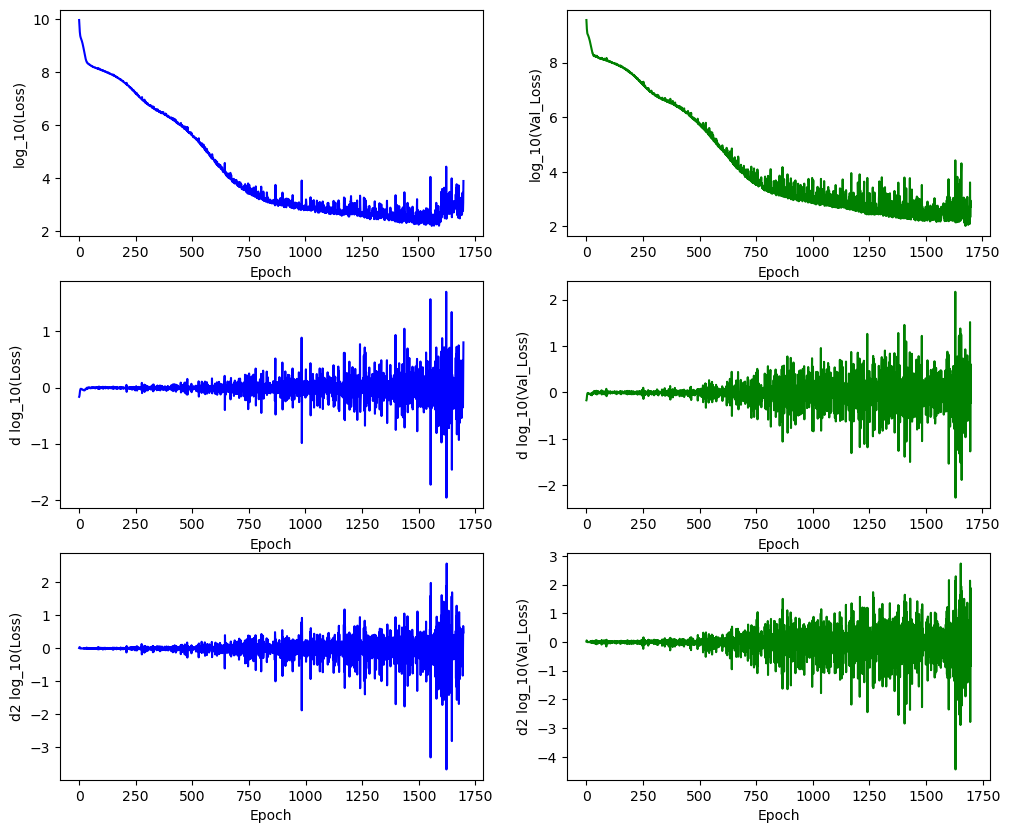

In [2]:
test_result = "Test on Variant 3123.dat"
plot_loss(test_result)

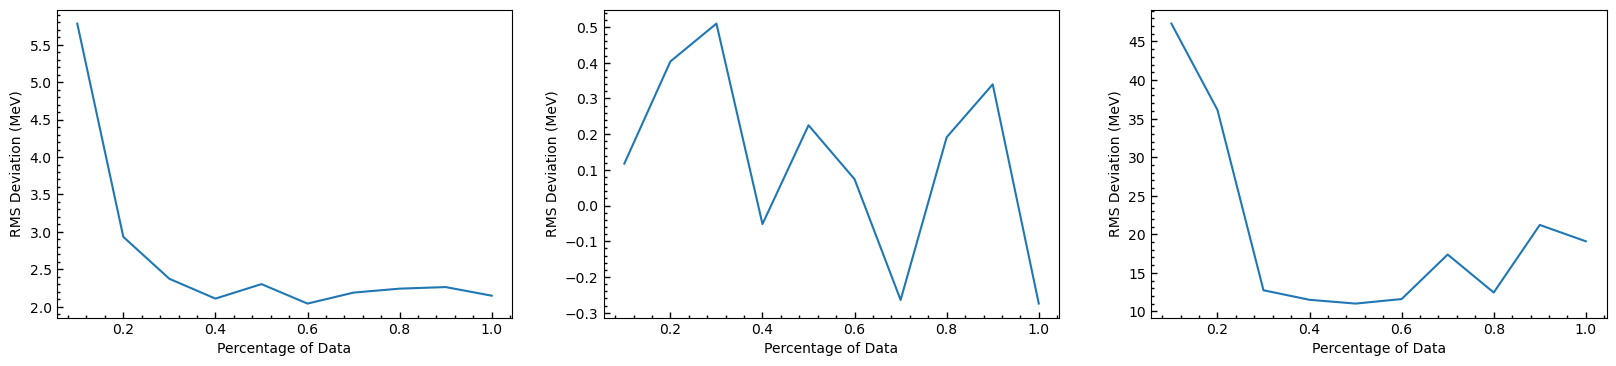

In [ ]:
percentage_data = pd.read_csv("data/output/250505/percentage_effect.csv")
fig, axes = plt.subplots(1, 3, figsize=(20, 4))

axes[0].plot(percentage_data["Percentage"], percentage_data["rms_dev"])
axes[0].set_ylabel("RMS Deviation (MeV)")
axes[0].set_xlabel("Percentage of Data")
utils.set_tick(axes[0])

axes[1].plot(percentage_data["Percentage"], percentage_data["avg_dev"])
axes[1].set_ylabel("Average Deviation")
axes[1].set_xlabel("Percentage of Data")
utils.set_tick(axes[1])

axes[2].plot(percentage_data["Percentage"], percentage_data["last_loss"])
axes[2].set_ylabel("RMS Deviation (MeV)")
axes[2].set_xlabel("Percentage of Data")
utils.set_tick(axes[2])